In [1]:
import numpy as np
import sys
import torch
from torchvision import datasets, transforms
import os
import numpy as np
from os.path import join, exists
import pandas as pd
import numpy as np
from multiae import DVCCA
import matplotlib.pyplot as plt
%matplotlib inline 

### Load the MNIST data

In [2]:
MNIST_1 = datasets.MNIST('./data/MNIST', train=False, download=True, transform=transforms.Compose([
        transforms.ToTensor()
    ]))
MNIST_2 = datasets.MNIST('./data/MNIST', train=False, download=True, transform=transforms.Compose([
        transforms.ToTensor(),        
    ]))

data_1 = MNIST_1.train_data.reshape(-1, 784).float() / 255.
target = MNIST_1.train_labels
data_2 = MNIST_2.train_data.float() / 255.
data_2 = torch.rot90(data_2, 1, [1, 2])
data_2 = data_2.reshape(-1,784)

C:\Users\anala\Anaconda3\lib\site-packages\torchvision\datasets\mnist.py:58: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
C:\Users\anala\Anaconda3\lib\site-packages\torchvision\datasets\mnist.py:48: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


### Define input parameters

In [3]:
#define training parameters
trainer_dict = {
                'checkpoint_metric_name': 'val_loss',
                'checkpoint_monitor_mode': 'min',
                'early_stopping': True,
                'early_stopping_delta': 0.0001,
                'early_stopping_patience': 30, 
                }
n_epochs = 150
batch_size = 2000
path = '../MNISTresults'

#define model parameters
dist = 'bernoulli'
n_latents = 10
hidden_layers = [100]
beta = 1
threshold = 0
learning_rate = 0.001
non_linear = False
save_model = True

In [9]:
models = DVCCA(input_dims=[784, 784], 
             dist=dist, 
             trainer_dict=trainer_dict,
             z_dim=n_latents,
             hidden_layer_dims=hidden_layers,
             n_epochs=n_epochs,
             learning_rate=learning_rate,
             beta=beta,
             threshold=threshold,
             save_model=save_model,
             )

In [10]:
print(models)

DVCCA(
  (encoder): ModuleList(
    (0): Encoder(
      (encoder_layers): Sequential(
        (0): Linear(in_features=784, out_features=100, bias=True)
      )
      (enc_mean_layer): Linear(in_features=100, out_features=10, bias=True)
      (enc_logvar_layer): Linear(in_features=100, out_features=10, bias=True)
    )
  )
  (private_encoders): ModuleList(
    (0): Encoder(
      (encoder_layers): Sequential(
        (0): Linear(in_features=784, out_features=100, bias=True)
      )
      (enc_mean_layer): Linear(in_features=100, out_features=10, bias=True)
      (enc_logvar_layer): Linear(in_features=100, out_features=10, bias=True)
    )
    (1): Encoder(
      (encoder_layers): Sequential(
        (0): Linear(in_features=784, out_features=100, bias=True)
      )
      (enc_mean_layer): Linear(in_features=100, out_features=10, bias=True)
      (enc_logvar_layer): Linear(in_features=100, out_features=10, bias=True)
    )
  )
  (decoders): ModuleList(
    (0): Decoder(
      (decoder_lay

### Train the model

In [11]:
models.fit(data_1, 
        data_2, 
        n_epochs=n_epochs, 
        output_path=path, 
        val_set=True)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs

  | Name             | Type       | Params
------------------------------------------------
0 | encoder          | ModuleList | 80.5 K
1 | private_encoders | ModuleList | 161 K 
2 | decoders         | ModuleList | 162 K 
------------------------------------------------
404 K     Trainable params
0         Non-trainable params
404 K     Total params
1.617     Total estimated model params size (MB)
C:\Users\anala\Anaconda3\lib\site-packages\pytorch_lightning\callbacks\model_checkpoint.py:623: UserWarning: Checkpoint directory C:\Users\anala\Documents\PhD\MNISTresults exists and is not empty.
  rank_zero_warn(f"Checkpoint directory {dirpath} exists and is not empty.")


C:\Users\anala\Anaconda3\lib\site-packages\pytorch_lightning\trainer\data_loading.py:117: UserWarning: The dataloader, val_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  f"The dataloader, {name}, does not have many workers which may be a bottleneck."


C:\Users\anala\Anaconda3\lib\site-packages\pytorch_lightning\trainer\data_loading.py:117: UserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  f"The dataloader, {name}, does not have many workers which may be a bottleneck."
C:\Users\anala\Anaconda3\lib\site-packages\pytorch_lightning\trainer\data_loading.py:413: UserWarning: The number of training samples (1) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.
  f"The number of training samples ({self.num_training_batches}) is smaller than the logging interval"


Metric val_loss improved. New best score: 1101.226


Metric val_loss improved by 10.376 >= min_delta = 0.0001. New best score: 1090.850


Metric val_loss improved by 12.997 >= min_delta = 0.0001. New best score: 1077.853


Metric val_loss improved by 16.734 >= min_delta = 0.0001. New best score: 1061.118


Metric val_loss improved by 20.150 >= min_delta = 0.0001. New best score: 1040.969


Metric val_loss improved by 23.873 >= min_delta = 0.0001. New best score: 1017.095


Metric val_loss improved by 29.909 >= min_delta = 0.0001. New best score: 987.186


Metric val_loss improved by 33.553 >= min_delta = 0.0001. New best score: 953.634


Metric val_loss improved by 36.568 >= min_delta = 0.0001. New best score: 917.066


Metric val_loss improved by 38.755 >= min_delta = 0.0001. New best score: 878.311


Metric val_loss improved by 39.177 >= min_delta = 0.0001. New best score: 839.134


Metric val_loss improved by 36.452 >= min_delta = 0.0001. New best score: 802.682


Metric val_loss improved by 31.323 >= min_delta = 0.0001. New best score: 771.359


Metric val_loss improved by 30.108 >= min_delta = 0.0001. New best score: 741.251


Metric val_loss improved by 25.781 >= min_delta = 0.0001. New best score: 715.470


Metric val_loss improved by 22.796 >= min_delta = 0.0001. New best score: 692.674


Metric val_loss improved by 22.019 >= min_delta = 0.0001. New best score: 670.654


Metric val_loss improved by 20.949 >= min_delta = 0.0001. New best score: 649.706


Metric val_loss improved by 18.924 >= min_delta = 0.0001. New best score: 630.782


Metric val_loss improved by 18.937 >= min_delta = 0.0001. New best score: 611.845


Metric val_loss improved by 14.992 >= min_delta = 0.0001. New best score: 596.853


Metric val_loss improved by 13.164 >= min_delta = 0.0001. New best score: 583.689


Metric val_loss improved by 12.020 >= min_delta = 0.0001. New best score: 571.669


Metric val_loss improved by 9.964 >= min_delta = 0.0001. New best score: 561.706


Metric val_loss improved by 9.525 >= min_delta = 0.0001. New best score: 552.181


Metric val_loss improved by 7.297 >= min_delta = 0.0001. New best score: 544.884


Metric val_loss improved by 8.070 >= min_delta = 0.0001. New best score: 536.814


Metric val_loss improved by 8.562 >= min_delta = 0.0001. New best score: 528.251


Metric val_loss improved by 5.184 >= min_delta = 0.0001. New best score: 523.067


Metric val_loss improved by 6.125 >= min_delta = 0.0001. New best score: 516.942


Metric val_loss improved by 5.084 >= min_delta = 0.0001. New best score: 511.858


Metric val_loss improved by 3.743 >= min_delta = 0.0001. New best score: 508.114


Metric val_loss improved by 4.617 >= min_delta = 0.0001. New best score: 503.498


Metric val_loss improved by 3.371 >= min_delta = 0.0001. New best score: 500.127


Metric val_loss improved by 2.590 >= min_delta = 0.0001. New best score: 497.537


Metric val_loss improved by 3.786 >= min_delta = 0.0001. New best score: 493.751


Metric val_loss improved by 4.156 >= min_delta = 0.0001. New best score: 489.595


Metric val_loss improved by 2.146 >= min_delta = 0.0001. New best score: 487.449


Metric val_loss improved by 2.694 >= min_delta = 0.0001. New best score: 484.756


Metric val_loss improved by 2.993 >= min_delta = 0.0001. New best score: 481.763


Metric val_loss improved by 2.338 >= min_delta = 0.0001. New best score: 479.424


Metric val_loss improved by 2.322 >= min_delta = 0.0001. New best score: 477.103


Metric val_loss improved by 1.769 >= min_delta = 0.0001. New best score: 475.334


Metric val_loss improved by 2.097 >= min_delta = 0.0001. New best score: 473.237


Metric val_loss improved by 1.484 >= min_delta = 0.0001. New best score: 471.753


Metric val_loss improved by 1.975 >= min_delta = 0.0001. New best score: 469.778


Metric val_loss improved by 1.371 >= min_delta = 0.0001. New best score: 468.407


Metric val_loss improved by 2.326 >= min_delta = 0.0001. New best score: 466.081


Metric val_loss improved by 0.971 >= min_delta = 0.0001. New best score: 465.110


Metric val_loss improved by 2.122 >= min_delta = 0.0001. New best score: 462.988


Metric val_loss improved by 1.551 >= min_delta = 0.0001. New best score: 461.437


Metric val_loss improved by 0.480 >= min_delta = 0.0001. New best score: 460.957


Metric val_loss improved by 1.498 >= min_delta = 0.0001. New best score: 459.459


Metric val_loss improved by 1.568 >= min_delta = 0.0001. New best score: 457.891


Metric val_loss improved by 0.512 >= min_delta = 0.0001. New best score: 457.380


Metric val_loss improved by 3.093 >= min_delta = 0.0001. New best score: 454.286


Metric val_loss improved by 0.341 >= min_delta = 0.0001. New best score: 453.945


Metric val_loss improved by 0.777 >= min_delta = 0.0001. New best score: 453.168


Metric val_loss improved by 2.261 >= min_delta = 0.0001. New best score: 450.907


Metric val_loss improved by 1.360 >= min_delta = 0.0001. New best score: 449.546


Metric val_loss improved by 2.146 >= min_delta = 0.0001. New best score: 447.401


Metric val_loss improved by 1.285 >= min_delta = 0.0001. New best score: 446.115


Metric val_loss improved by 0.728 >= min_delta = 0.0001. New best score: 445.387


Metric val_loss improved by 2.076 >= min_delta = 0.0001. New best score: 443.312


Metric val_loss improved by 0.735 >= min_delta = 0.0001. New best score: 442.577


Metric val_loss improved by 1.103 >= min_delta = 0.0001. New best score: 441.474


Metric val_loss improved by 1.474 >= min_delta = 0.0001. New best score: 440.000


Metric val_loss improved by 0.061 >= min_delta = 0.0001. New best score: 439.939


Metric val_loss improved by 2.483 >= min_delta = 0.0001. New best score: 437.456


Metric val_loss improved by 0.731 >= min_delta = 0.0001. New best score: 436.726


Metric val_loss improved by 1.362 >= min_delta = 0.0001. New best score: 435.363


Metric val_loss improved by 1.668 >= min_delta = 0.0001. New best score: 433.695


Metric val_loss improved by 1.189 >= min_delta = 0.0001. New best score: 432.507


Metric val_loss improved by 1.838 >= min_delta = 0.0001. New best score: 430.669


Metric val_loss improved by 1.625 >= min_delta = 0.0001. New best score: 429.044


Metric val_loss improved by 0.133 >= min_delta = 0.0001. New best score: 428.910


Metric val_loss improved by 1.529 >= min_delta = 0.0001. New best score: 427.382


Metric val_loss improved by 0.728 >= min_delta = 0.0001. New best score: 426.653


Metric val_loss improved by 0.858 >= min_delta = 0.0001. New best score: 425.795


Metric val_loss improved by 2.993 >= min_delta = 0.0001. New best score: 422.802


Metric val_loss improved by 0.811 >= min_delta = 0.0001. New best score: 421.991


Metric val_loss improved by 1.201 >= min_delta = 0.0001. New best score: 420.790


Metric val_loss improved by 1.814 >= min_delta = 0.0001. New best score: 418.977


Metric val_loss improved by 2.003 >= min_delta = 0.0001. New best score: 416.974


Metric val_loss improved by 1.084 >= min_delta = 0.0001. New best score: 415.890


Metric val_loss improved by 1.484 >= min_delta = 0.0001. New best score: 414.407


Metric val_loss improved by 1.249 >= min_delta = 0.0001. New best score: 413.158


Metric val_loss improved by 1.190 >= min_delta = 0.0001. New best score: 411.968


Metric val_loss improved by 1.635 >= min_delta = 0.0001. New best score: 410.334


Metric val_loss improved by 0.776 >= min_delta = 0.0001. New best score: 409.558


Metric val_loss improved by 1.284 >= min_delta = 0.0001. New best score: 408.274


Metric val_loss improved by 1.893 >= min_delta = 0.0001. New best score: 406.381


Metric val_loss improved by 1.376 >= min_delta = 0.0001. New best score: 405.005


Metric val_loss improved by 1.092 >= min_delta = 0.0001. New best score: 403.913


Metric val_loss improved by 1.608 >= min_delta = 0.0001. New best score: 402.306


Metric val_loss improved by 1.960 >= min_delta = 0.0001. New best score: 400.346


Metric val_loss improved by 1.671 >= min_delta = 0.0001. New best score: 398.675


Metric val_loss improved by 0.561 >= min_delta = 0.0001. New best score: 398.114


Metric val_loss improved by 1.815 >= min_delta = 0.0001. New best score: 396.299


Metric val_loss improved by 0.876 >= min_delta = 0.0001. New best score: 395.424


Metric val_loss improved by 1.419 >= min_delta = 0.0001. New best score: 394.005


Metric val_loss improved by 1.379 >= min_delta = 0.0001. New best score: 392.626


Metric val_loss improved by 0.567 >= min_delta = 0.0001. New best score: 392.059


Metric val_loss improved by 2.154 >= min_delta = 0.0001. New best score: 389.905


Metric val_loss improved by 0.568 >= min_delta = 0.0001. New best score: 389.337


Metric val_loss improved by 1.635 >= min_delta = 0.0001. New best score: 387.703


Metric val_loss improved by 1.116 >= min_delta = 0.0001. New best score: 386.587


Metric val_loss improved by 0.135 >= min_delta = 0.0001. New best score: 386.452


Metric val_loss improved by 1.593 >= min_delta = 0.0001. New best score: 384.859


Metric val_loss improved by 1.114 >= min_delta = 0.0001. New best score: 383.745


Metric val_loss improved by 1.590 >= min_delta = 0.0001. New best score: 382.155


Metric val_loss improved by 1.581 >= min_delta = 0.0001. New best score: 380.575


Metric val_loss improved by 1.752 >= min_delta = 0.0001. New best score: 378.823


Metric val_loss improved by 1.234 >= min_delta = 0.0001. New best score: 377.588


Metric val_loss improved by 0.047 >= min_delta = 0.0001. New best score: 377.541


Metric val_loss improved by 1.703 >= min_delta = 0.0001. New best score: 375.838


Metric val_loss improved by 0.060 >= min_delta = 0.0001. New best score: 375.778


Metric val_loss improved by 1.808 >= min_delta = 0.0001. New best score: 373.970


Metric val_loss improved by 0.870 >= min_delta = 0.0001. New best score: 373.100


Metric val_loss improved by 1.231 >= min_delta = 0.0001. New best score: 371.869


Metric val_loss improved by 1.138 >= min_delta = 0.0001. New best score: 370.732


Metric val_loss improved by 0.337 >= min_delta = 0.0001. New best score: 370.394


Metric val_loss improved by 1.254 >= min_delta = 0.0001. New best score: 369.141


Metric val_loss improved by 0.537 >= min_delta = 0.0001. New best score: 368.604


Metric val_loss improved by 0.844 >= min_delta = 0.0001. New best score: 367.760


Metric val_loss improved by 1.266 >= min_delta = 0.0001. New best score: 366.494


Metric val_loss improved by 0.814 >= min_delta = 0.0001. New best score: 365.681


Metric val_loss improved by 0.760 >= min_delta = 0.0001. New best score: 364.921


Metric val_loss improved by 0.906 >= min_delta = 0.0001. New best score: 364.014


Metric val_loss improved by 1.241 >= min_delta = 0.0001. New best score: 362.774


Metric val_loss improved by 1.099 >= min_delta = 0.0001. New best score: 361.674


Metric val_loss improved by 0.845 >= min_delta = 0.0001. New best score: 360.829


Metric val_loss improved by 0.521 >= min_delta = 0.0001. New best score: 360.309


Metric val_loss improved by 1.333 >= min_delta = 0.0001. New best score: 358.975


Metric val_loss improved by 1.397 >= min_delta = 0.0001. New best score: 357.578


Metric val_loss improved by 0.534 >= min_delta = 0.0001. New best score: 357.044


Metric val_loss improved by 0.740 >= min_delta = 0.0001. New best score: 356.304


Metric val_loss improved by 1.153 >= min_delta = 0.0001. New best score: 355.151


Metric val_loss improved by 1.083 >= min_delta = 0.0001. New best score: 354.068


Metric val_loss improved by 0.830 >= min_delta = 0.0001. New best score: 353.239


Metric val_loss improved by 0.739 >= min_delta = 0.0001. New best score: 352.500


Metric val_loss improved by 0.204 >= min_delta = 0.0001. New best score: 352.296


Metric val_loss improved by 1.031 >= min_delta = 0.0001. New best score: 351.266


Metric val_loss improved by 0.153 >= min_delta = 0.0001. New best score: 351.112


Metric val_loss improved by 1.723 >= min_delta = 0.0001. New best score: 349.389


In [12]:
!tensorboard --logdir=../MNISTresults/logs

^C


In [13]:
latents = models.predict_latents(data_1, data_2)

### Create UMAP plots - how well does the latent space separate MNIST labels?

In [14]:
models.plot_UMAP(data=latents, target=target, title=['Original MNIST latent space', 'Rotated MNIST latent space'], title_short='MNIST')

C:\Users\anala\Anaconda3\lib\site-packages\numba\np\ufunc\parallel.py:366: NumbaWarning: The TBB threading layer requires TBB version 2021 update 1 or later i.e., TBB_INTERFACE_VERSION >= 12010. Found TBB_INTERFACE_VERSION = 11004. The TBB threading layer is disabled.
  warnings.warn(problem)
C:\Users\anala\Documents\PhD\library_dev\multiae\plot\plotting.py:80: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(join(self.output_path, 'UMAP_{0}.png'.format(title_short[i])))
C:\Users\anala\Documents\PhD\library_dev\multiae\plot\plotting.py:80: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(join(self.output_path, 'UMAP_{0}.png'.format(title_short[i])))


In [15]:
pred = models.predict_reconstruction(data_1, data_2)

### Reconstruction plots - how well can the VAE do same view reconstruction?

In [18]:
data_sample = data_1[20]
#indices: view 1 decoder, sample 21
pred_sample = pred[0][20]

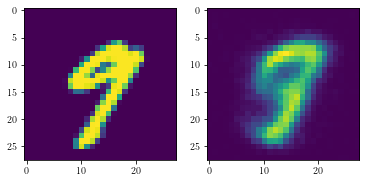

In [19]:
fig, axarr = plt.subplots(1, 2)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
axarr[0].imshow(data_sample.reshape(28,28))
axarr[1].imshow(pred_sample.reshape(28,28))

### Reconstruction plots - how well can the VAE do cross view reconstruction?

In [20]:
data_sample = data_1[20]
#indices:view 2 decoder, sample 21
pred_sample = pred[1][20]

ValueError: cannot reshape array of size 1 into shape (28,28)

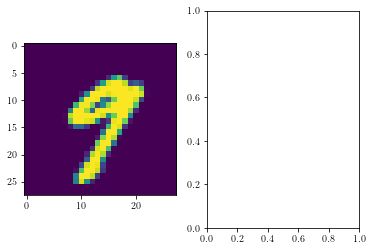

In [21]:
fig, axarr = plt.subplots(1, 2)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
axarr[0].imshow(data_sample.reshape(28,28))
axarr[1].imshow(pred_sample.reshape(28,28))